In [2]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score
from tslearn.metrics import cdist_dtw
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:
data_path = '..\data\processed\\time_series_2017_2018[Transformation].csv'
df_data = pd.read_csv(data_path)
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')
df_data.sample(5)

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
ts,,,,,,,,,,,,,,,,,,,,,
2017-12-07,26.983881,29.285580,29.719407,30.045979,30.327321,30.659300,31.576196,31.563430,31.447468,31.797018,...,32.670417,32.921754,33.259289,29.545278,27.632467,27.734352,27.348895,27.836534,28.146041,28.425613
2017-03-13,29.424305,30.287695,30.315944,30.380639,29.622607,29.481737,30.216639,30.923443,31.599945,32.243834,...,34.950928,34.437010,35.413819,32.876591,31.396811,30.173706,29.334462,28.688382,28.520812,28.345683
2018-11-03,26.110524,23.995218,25.588054,26.202651,26.401200,26.375199,29.066156,31.838475,33.953962,35.755153,...,37.680702,37.462098,37.834219,37.093901,34.188050,28.087652,24.559382,24.715662,23.858363,23.717174
2017-06-07,25.672737,32.502710,27.069029,25.319887,25.162681,24.509586,23.256320,23.368387,23.957783,26.256881,...,31.638628,31.671730,32.150564,31.085637,28.772749,27.550533,26.475904,25.585787,24.797494,24.019184
2018-11-23,26.107321,23.804051,25.698470,26.183333,25.820498,25.602141,28.565922,31.045785,32.361222,33.802444,...,30.201656,26.043530,27.208134,27.548048,27.659022,26.860308,26.997871,26.924097,26.468704,27.101328


In [13]:
X_train = df_data.values.copy()
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

In [14]:
interval = 25
number_cluster = 3
km = TimeSeriesKMeans(n_clusters=number_cluster,
                           metric="softdtw",
                           metric_params={"gamma": 1},
                           verbose=True,
                           init='random',
                           max_iter=200)
y_pred = km.fit_predict(X_train)
coff2 = silhouette_score(X_train, y_pred, metric="softdtw",metric_params={"gamma": 1})
print('Silhoutte: ',coff2)
cluster_found_sr = pd.Series(y_pred, name='cluster')


df_cluster = df_data.copy()
df_cluster['cluster'] = y_pred

df_data = df_data.set_index(cluster_found_sr, append=True )
cluster_values = sorted(df_data.index.get_level_values('cluster').unique())

centroids = sc.inverse_transform(km.cluster_centers_[:,:,0])


1394.531 --> 1431.499 --> 1437.280 --> 1439.266 --> 1439.661 --> 1439.809 --> 1439.874 --> 1439.892 --> 1439.901 --> 1439.906 --> 1439.912 --> 1439.925 --> 1439.938 --> 1439.939 --> 1439.939 --> 1439.940 --> 1439.942 --> 1439.943 --> 1439.943 --> 1439.943 --> 
Silhoutte:  0.575827739501045


<IPython.core.display.Javascript object>


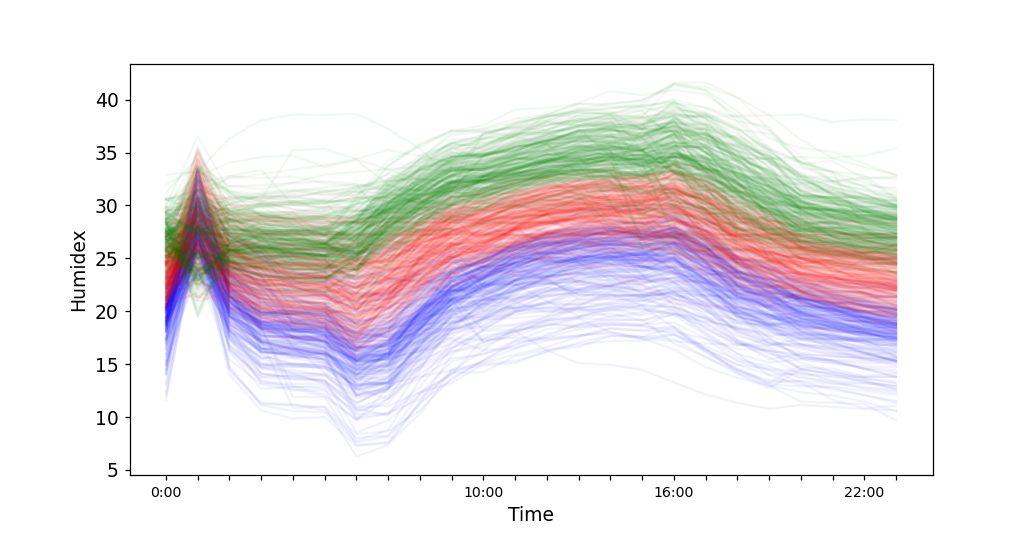

0  Dias:  (209, 24)
1  Dias:  (263, 24)
2  Dias:  (258, 24)


In [40]:
color_list = ['blue','red','green','orange','yellow','black','purple','skyblue','cyan','brown']
LS = ['--','-','-.','-','--',':'] 

for cluster, color in zip(cluster_values, color_list):
    curvas = df_data.xs(cluster, level=1)
    plt.plot(np.arange(1,interval),curvas.T, alpha=0.05, color=color)
    #plt.plot(np.arange(1,interval),centroids[cluster][:interval-1].ravel(),color=color,
    #         label= f'C{cluster}',alpha=0.9, ls=LS[cluster])
    print(cluster,' Dias: ',curvas.shape)
    
plt.xticks(np.arange(1,interval),['0:00','','','','','','','','','','10:00','',
                                   '','','','','16:00','','','','','','22:00','',''],fontsize=9)
plt.yticks(fontsize=12)
plt.ylabel('Humidex',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


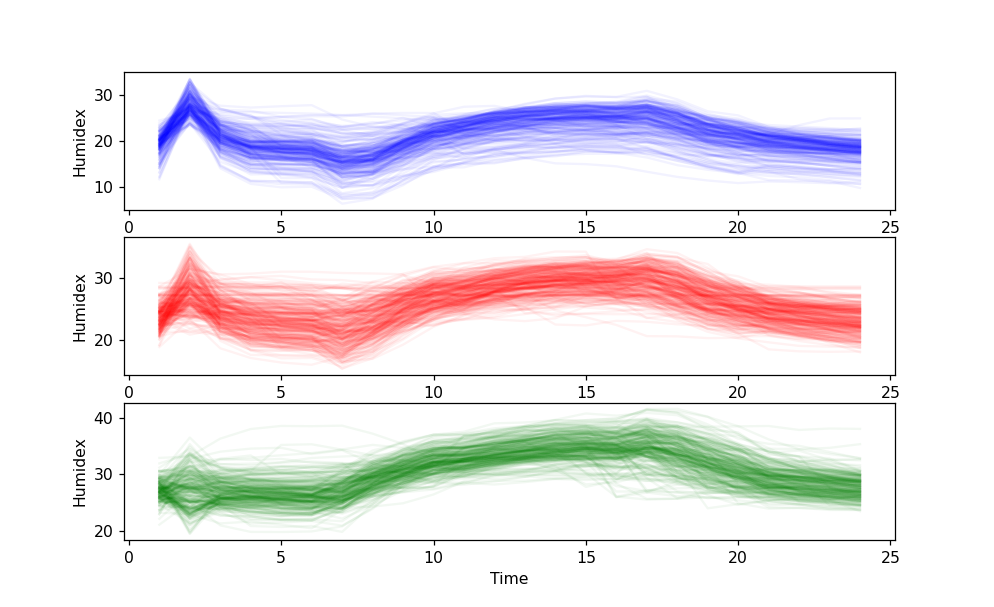

0  Dias:  (209, 24)
1  Dias:  (263, 24)
2  Dias:  (258, 24)


In [41]:
fig, axs = plt.subplots(3, 1)
color_list = ['blue','red','green','orange','yellow','black','purple','skyblue','cyan','brown']
for cluster, color in zip(cluster_values, color_list):
    curvas = df_data.xs(cluster, level=1)
    axs[cluster].plot(np.arange(1,interval),curvas.T, alpha=0.05, color=color)
    print(cluster,' Dias: ',curvas.shape)

for ax in axs.flat:
    #ax.set_xticks(np.arange(1,interval),['0:00','','','','','','','','','','10:00','','','','','','16:00','','','','','','22:00','',''])
    ax.set_ylabel('Humidex')
    ax.set_xlabel('Time')
plt.show()

In [16]:
df_cluster.to_csv('..\data\processed\cluster_2017_2018[DataMining].csv')

In [17]:
df_cluster

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,cluster
ts,,,,,,,,,,,,,,,,,,,,,
2017-01-01,24.720297,24.884933,24.592768,24.430554,24.337462,24.290917,24.473028,24.960593,26.359601,27.580916,...,30.469021,30.505261,29.655900,26.467625,24.995911,24.639636,24.468891,24.467684,24.514259,1
2017-01-02,24.515005,24.567162,24.523267,24.072398,23.537497,23.697903,25.141417,26.779263,29.186864,30.881256,...,31.973813,32.814528,30.974344,28.775255,26.958593,25.835757,25.388821,25.148007,24.736352,1
2017-01-03,24.625508,25.810377,24.652209,24.082442,23.527147,23.206193,24.010241,26.439743,28.465257,29.951692,...,32.533527,33.930974,33.449527,31.053808,28.427693,26.165173,25.350965,24.948666,24.624170,1
2017-01-04,25.083171,27.136559,24.292624,23.295476,23.150642,23.078906,24.858079,27.965316,29.798976,31.751619,...,34.395202,35.566063,34.469348,33.503785,31.268657,29.603481,28.340487,27.633380,26.954642,2
2017-01-05,27.058265,29.412806,27.220187,25.993376,25.649774,25.661876,26.049949,29.101168,31.151391,32.898857,...,34.926547,35.607100,35.459651,32.920551,30.791544,28.583688,27.057595,26.009531,25.414172,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,26.218254,25.467183,27.816983,28.999039,28.243997,28.933953,29.103618,29.533066,30.456939,30.274303,...,35.455336,36.769434,34.333727,28.885920,27.284024,27.620258,27.491967,27.396072,27.301787,2
2018-12-28,25.798320,24.255782,24.793719,24.810622,24.057444,23.900700,26.786712,30.207978,32.033064,33.491142,...,35.284143,35.843503,33.365163,31.785320,30.048884,27.955494,27.966673,27.298918,26.698942,2
2018-12-29,25.863464,22.061071,23.675685,24.116289,24.232235,24.044207,26.803722,30.235145,31.961981,33.905968,...,36.531953,38.165504,37.760632,36.316617,34.339284,31.269875,30.249278,29.528676,28.716269,2
